# Survival Analysis - Predicting Time to Event 

Let's understand the intuition behind survival analysis concepts and how to implement in detail on real world applications. 


## 1. What is Survival Analysis

Survival analysis tries to answer the question: _"How long would it be before a given event occurs?"._

Survival analysis is a branch of statistics that measures the time to occurence of an event. While the term 'Survival Analysis' is common in clinical research, where the intents is in predicting the the survival durations of patients. 

This same idea goes by multiple names, such as __'reliability analysis'__ in engineering and __'duration analysis'__ in economics. We simply refer this to as __'Time to Event'__ analysis.

However, we are not just interested in a point estimate of 'when' the event would occur. Survival analysis concerns with the estimation of the survival curves and the hazard functions over the course of time for the participants concerned. 

__What we will learn?__

In this, we will try to build upon the ideas from scratch, first understanding the intuition and meaning behind the terms, then, implement them from scratch without using any survival analysis related libraries. Then we will implement the same using the `lifelines` or `scikit-survival` packages, followed by more advanced techniques and evaluating the models.

## 2. Real World Applications of Survival Analysis

There are so many potential applications of Survival analysis in the real world. Only that, this technique is not so popular / 'difficult' to understand that it doesn't get use so widely.

Today, we will understand the entire concept very clearly. Some of the applications of Survival analysis are as follows:

#### Use cases

1. __Predictive maintenance__: How long will the machine last?
2. __Customer Analytics__: Churn prediction, Time to come for service 
3. __Marketing Analytics__: Time to conversion
4. __Actuarial Analysis__: Time to death (for determining insurance premiums)

#### Example problems

- How long before a piece of equipment needs maintenance?
- How long before a customer bring his vehicle for service?
- How long before a lead will get converted to a paying customer?
- How long before a customer will unsubscribe/subscribe?
- How long before a patient vacate the bed? 
- How long before a client pays back debt?
- How long before a customer service issue is resolved?
- How long before a client makes another purchase?
- How long before a device breaks down?
- How long before an employee quits?

#### What questions can survival analysis answer?

- Can a different approach / treatment improve survival time?
- Can we predict the survival time of a person / device?
- Can we predict the chance of death at a certain time?

#### Survival Analysis Objectives and Techniques

- Identify survival times: Kaplan Meier Estimator
- Comparing survival times of groups: Log Rank test
- Describe effect of features on survival: Cox-Proportional Hazards model

## 2.a When to use Survival Analysis?

Let's say you have the following data and you want to predict if a given machine will fail at a certain time.

| Cost   | Years in Service | No.of Repairs | In Charge | Failed |
|--------|------------------|---------------|-----------|--------|
| 75000  | 2                | 1             | Michael   | 0      |
| 105000 | 4                | 2             | Ramany    | 0      |
| 40000  | 2                | 0             | Abdul     | 1      |


Tendency is to treat this as a classification problem and try to predict if a machine will fail or not.

But, if the classifier predicts if a machine will fail, how can we know 'when' is it likely to fail? what are the chances that the machine will fail at a given moment in time?

Classifiers don't answer these questions. 

Using survival analysis, we can tell the probability of the machine failing as a function of time. We can also tell if a given precautionary measure worked in improving the survival or not, so that you can act on it and potentially know if something worked. 

So, it will be beneficial to pursue Survival analysis for such problems than go for classification problems.

<img src="survival_curve.png" alt="Kaplan Meier" style="width: 400px;margin: auto"/>
Source: sthda.com

## 3. Math Intuition - Survival and Hazard function

__The Event__

In order to understand survival, we need to first know what is an 'event'.

The Event is an 'event' that happens to the item / person under study. This is a clear binary occurrence without any ambiguitiy about whether the event occurred or not. For example: Death/recover, subscribe/unsubscribe, quit/join etc. Whatever the event is there is a clear definition of what can be counted as an event.

In survival analysis we are not only interested to know 'when' this event could occur, but also the probability of an event occurring at a certain time and what proportion of the population might experience it. We also want to know what factors contributed to it and it any given factor made a significant difference.

#### Survival and Hazard Functions

The survival and hazard functions are like (not exactly) opposites of each other. 

__Survival Function__

First, let's see __survival function__.

Survival funtion S(t) indicates the probability of an object's survival after a certain time 't'.

The survival function is the probability that the event occurs after time 't'

$$S(t) = P(T > t)$$

Where, 

    S(t) : Probability that the event happens after time 't'.
    T    : Time of occurrence
    t    : Observation time


__Hazard Function__

Now, __Hazard function__ is the probability that an event happens at some time 't' given it has survived up to that time.

It is understood as: At any given time 't', out of all the items that survived till time 't', how many encountered the event AT 't'.

Computationally it is: the ratio of number of items experiencing the event at time 't' divided by the number of items survived till time 't'.

$$h(t) = \frac{f(t)}{S(t)}$$


__The Kaplan Meier Estimator__

The Kaplan Meier estimator is a popular non-parametric model to estimate the survival function of time-to-event data.


<img src="km_estimator_formula.png" alt="Kaplan Meier" style="width: 250px;margin: auto"/>

Where,

    ti: Time duration
    di: number of events occurring AT time 't'
    ni: number of survivors available UP TO time 't'

Notice in above formula, $\frac{di}{ni}$ is nothing but the Hazard function.

We will later use this formula to back-calculate survival function from hazard function.



#### 

## 4. Types of Censored Data

While collecting data for survival analysis, it might not be feasible to observe the 'event' on ALL observations. For example: when studying time to failure of equipments, from a sample of equipments under study, only some of the equipments would have actually failed during the duration of study.

The failure occurrence of remaining equipments, though will happen in the future, may not have been captured, yet.

Such data where the start or end or both is not observed is considered as 'censored' data. In survival analysis, we typically include both types: complete and censored.

Accordingly, censoring is of 3 types:

1. __Right-censored__    : Starting point in known, ending point is not. Ex: Certain machines have not failed yet.

<img src="right_censored.png" alt="Kaplan Meier" style="width: 250px;margin: auto"/>

2. __Left-censored__     : Starting point in unknown, ending point is known. Ex: Time of infection not known.

<img src="left_censored.png" alt="Kaplan Meier" style="width: 250px;margin: auto"/>


3. __Interval-censored__ : Both starting and ending not known. Ex: We only know a patient got chickenpox but the exact dates are unknown.

<img src="interval_censored.png" alt="Kaplan Meier" style="width: 250px;margin: auto"/>

# SECTION 2: Computing Survival and Hazard functions from scratch

The following example is based on the [notebook](https://nbviewer.org/github/AllenDowney/SurvivalAnalysisPython/blob/master/soln/01_light_bulb.ipynb) by Dr. Allen Downey.

## 5. Import the dataset

__Light bulb lifetimes__

__Dataset Info:__

V.J. Menon and D.C. Agrawal,  Renewal Rate of Filament Lamps

Description:

An assembly of 50 new Philips (India) lamps with the 
rating 40 W, 220 V (AC) was taken and installed in the horizontal 
orientation and uniformly distributed over a lab area 11 m by 7 m. 

The assembly was monitored at regular intervals of 12 h to
look for failures. The instants of recorded failures were
called t‘ and a total of 32 data points were obtained such
that even the last bulb failed. 

Variables:

- i - observation number
- h - time in hours since experiment start
- f - number of failed lamps at particular time h
- K - number of surviving lamps  at particular time h

__Import packages__

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
datafile = 'data/lightbulb.csv'
df = pd.read_csv(datafile, index_col=0)
df.head()

,h,f,K
i,,,
0,0,0,50
1,840,2,48
2,852,1,47
3,936,1,46
4,960,1,45


## 6. Probability Mass Function (PMF)

This dataset is complete in the sense that the experiment ran until all light bulbs failed, so the lifetime for every bulb is known. So we can use the data to estimate the probability mass function (PMF) of lifetimes.

To represent a PMF, I'll use a Pandas Series with the lifetimes (column h) as the index and the number of failures (column f) as the values.

In [13]:
pmf = pd.Series(df['f'].values, index=df['h'])
pmf.index.name = 't'
pmf.head()

t
0      0
840    2
852    1
936    1
960    1
dtype: int64

To normalize the PMF, we divide through by the total number of lightbulbs.

In [14]:
pmf /= pmf.sum()
pmf.head()

t
0      0.00
840    0.04
852    0.02
936    0.02
960    0.02
dtype: float64

For a given lifetime, t, the PMF contains the fraction of lifetimes equal to t. For example, we can compute the fraction of light bulbs that lasted 840 hours.

In [15]:
pmf[840]

0.04

The fraction that failed at 1524 hours:

In [16]:
pmf[1524]

0.06

__A plot decorator__

In [17]:
def decorate(**options):
    """Decorate the current axes.
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    plt.gca().set(**options)
    plt.tight_layout()

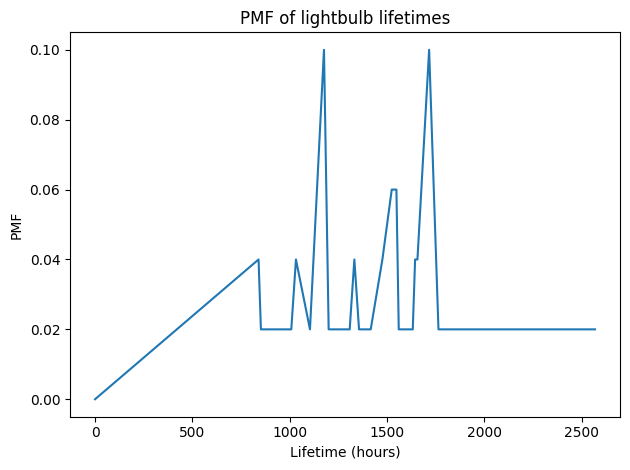

In [18]:
pmf.plot()
decorate(xlabel='Lifetime (hours)', 
         ylabel='PMF', 
         title='PMF of lightbulb lifetimes')

## 7. Cumulative Density Function (CDF)

Let's compute the CDF, which is nothing but the cumulative sum of PDF.


In [19]:
cdf = pmf.cumsum()
cdf.head()

t
0      0.00
840    0.04
852    0.06
936    0.08
960    0.10
dtype: float64

In [20]:
cdf[840]

0.04

And the fraction that expired at or before 1524 hours.

In [21]:
cdf[1524]

0.6000000000000001

__CDF Plot__

This plot shows the fraction of lightbulbs that went out as time went by.

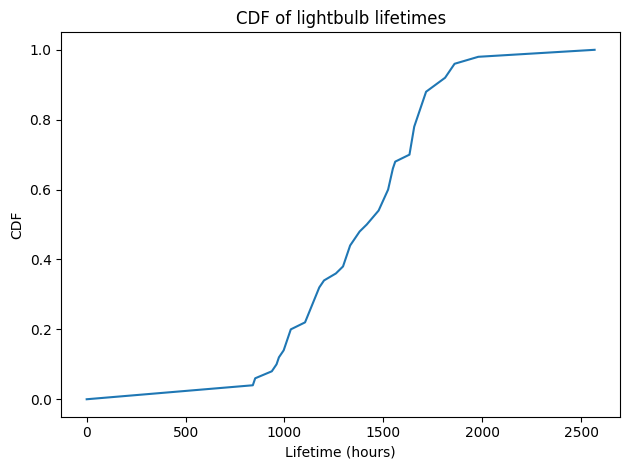

In [22]:
cdf.plot()
decorate(xlabel='Lifetime (hours)', 
         ylabel='CDF', 
         title='CDF of lightbulb lifetimes')

## 8. Implementing Survival Function

The survival function is the complement of the CDF; that is, for a given lifetime, t:

- The CDF is the fraction of the population less than or equal to t.

- The survival function is the fraction (strictly) greater than t.

We can compute the survival function like this:

In [23]:
surv = 1 - cdf
surv.head()

t
0      1.00
840    0.96
852    0.94
936    0.92
960    0.90
dtype: float64

The fraction of lightbulbs that lived longer than 1524:

In [24]:
surv[1524]

0.3999999999999999

__Plot Survival function__

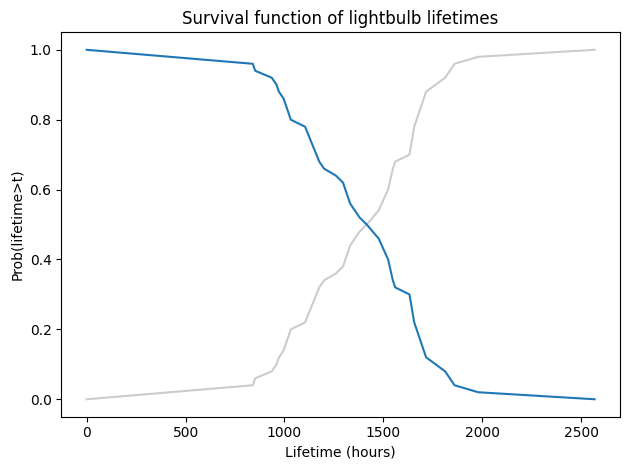

In [25]:
cdf.plot(color='gray', alpha=0.4)
surv.plot()
decorate(xlabel='Lifetime (hours)', 
         ylabel='Prob(lifetime>t)', 
         title='Survival function of lightbulb lifetimes')

## 9. Implementing Hazard Function

For a given lifetime t, the hazard function computes the "hazard rate" at t. Using the vocabulary of the light bulb example, the hazard rate is the fraction of light bulbs that survive until t and then fail at t.

We can compute the hazard rate by computing these quantities:

- pmf(t) is the fraction of light bulbs that fail at t.

- surv(t) is the fraction of light bulbs that live longer than t.

- The sum, pmf(t) + surv(t) is the fraction that survive until t.

So the hazard rate is the ratio of pmf(t) to the sum pmf(t) + surv(t). We can compute it like this:

In [26]:
haz = pmf / (pmf + surv)
haz.head()

t
0      0.000000
840    0.040000
852    0.020833
936    0.021277
960    0.021739
dtype: float64

__Plot Hazard function__

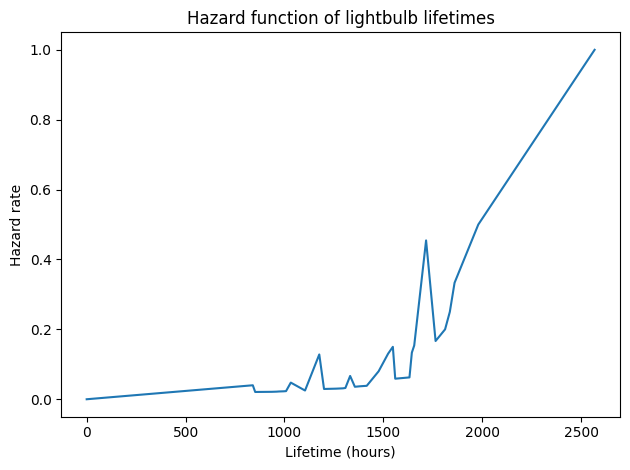

In [27]:
haz.plot()
decorate(xlabel='Lifetime (hours)', 
         ylabel='Hazard rate', 
         title='Hazard function of lightbulb lifetimes')

We have two problems here:

1. The plot shows spikes at the locations of the data, but it is hard to see the shape of the curve.
2. 
The large values on the right are unreliable because they are based on a small number of values.

In [28]:
# f is number of failed lamps
# K is number of surviving lamps
df.tail()

,h,f,K
i,,,
28,1812,1,4
29,1836,1,3
30,1860,1,2
31,1980,1,1
32,2568,1,0


In [29]:
df.tail()

,h,f,K
i,,,
28,1812,1,4
29,1836,1,3
30,1860,1,2
31,1980,1,1
32,2568,1,0


The last value of the hazard function is based on only one bulb; the second-to-last point is based on 2 bulbs; and so on. So, there is not much confidence in the values of estimated hazard function towards the end.

__Cumulative hazard function__

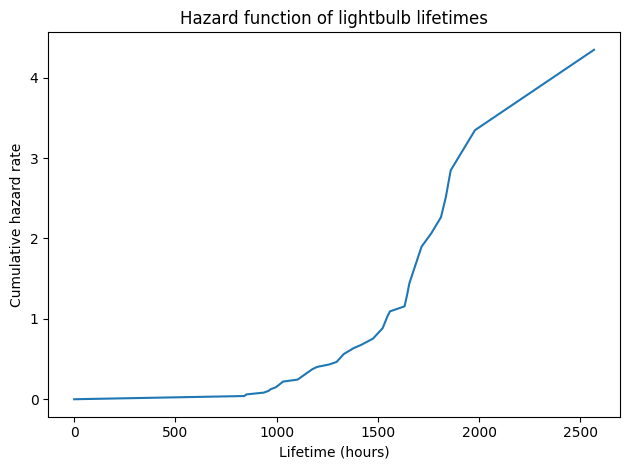

In [30]:
haz.cumsum().plot()

decorate(xlabel='Lifetime (hours)', 
         ylabel='Cumulative hazard rate', 
         title='Hazard function of lightbulb lifetimes')

The values don't mean much in the above chart because they are cumulative sum of 'rates'. You can't really sum up rates, doesnt make sense.

But, we can see where the hazar rates are too steep and shallow.

- Between 0 and 1000 hours, the slope is low, so the hazard rate is low.
- 
Between 1000 and 2000 hours, the slope is increasing, so the hazard rate is increasing.

## 10. Resampling for confidence

First Let's use the Pmf of lifetimes to make a kernel density estimate (KDE) of the distribution.

We will use this to generate more samples that imitate data with similar distribution (light bulb outages).

In [39]:
print(pmf.index)
print(pmf.values)

Int64Index([   0,  840,  852,  936,  960,  972,  996, 1008, 1032, 1104, 1176,
            1200, 1260, 1296, 1308, 1332, 1356, 1380, 1416, 1476, 1524, 1548,
            1560, 1632, 1644, 1656, 1716, 1764, 1812, 1836, 1860, 1980, 2568],
           dtype='int64', name='t')
[0.   0.04 0.02 0.02 0.02 0.02 0.02 0.02 0.04 0.02 0.1  0.02 0.02 0.02
 0.02 0.04 0.02 0.02 0.02 0.04 0.06 0.06 0.02 0.02 0.04 0.04 0.1  0.02
 0.02 0.02 0.02 0.02 0.02]


In [31]:
from scipy.stats import gaussian_kde
    
kde = gaussian_kde(pmf.index, weights=pmf)
size = df['f'].sum()

In [33]:
size  # n bulbs

50

We can use the KDE to draw a new sample of lifetimes, with the same size as the original data set, like this.

In [35]:
sample = kde.resample(size).flatten()
sample.shape

(50,)

The following function takes a sample and computes its PMF, CDF, survival function, and hazard function.

In [67]:
def make_hazard(sample):
    pmf = pd.Series(sample).value_counts(normalize=True).sort_index()    
    cdf = pmf.cumsum()
    surv = 1 - cdf
    haz = pmf / (pmf + surv)
    return pmf, cdf, surv, haz

Let's generate 100 samples and plot their survival functions


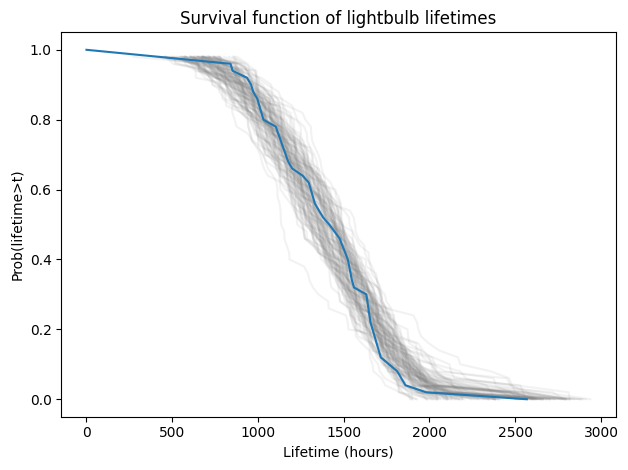

In [41]:
for i in range(100):
    sample = kde.resample(size).flatten()
    _, _, sf, _ = make_hazard(sample)
    sf.plot(color='gray', alpha=0.1)
    
surv.plot()
decorate(xlabel='Lifetime (hours)', 
         ylabel='Prob(lifetime>t)', 
         title='Survival function of lightbulb lifetimes')

Do the same for Hazard functions.

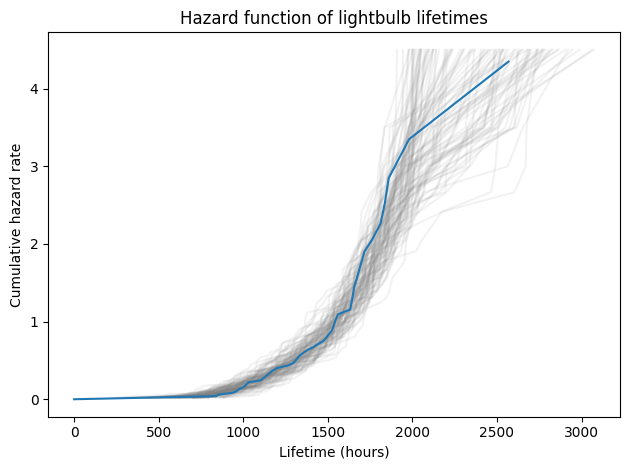

In [42]:
for i in range(100):
    sample = kde.resample(size).flatten()
    _, _, _, hf = make_hazard(sample)
    hf.cumsum().plot(color='gray', alpha=0.1)

haz.cumsum().plot()

decorate(xlabel='Lifetime (hours)', 
         ylabel='Cumulative hazard rate', 
         title='Hazard function of lightbulb lifetimes')

This plot gives us a sense of which parts of the cumulative hazard function are reliable and which are not.

Below 2000 hours, all of the resampled curves are similar; they increase with increasing slope.

After that, the variability of the curves is much wider, which means we don't have enough data to characterize this part of the hazard function.

# SECTION 3: Kaplan Meier Estimation from scratch

This example is based on the following [notebook](https://nbviewer.org/github/AllenDowney/SurvivalAnalysisPython/blob/master/soln/02_kaplan_meier.ipynb) from Dr. Allen Downey.

Kaplan Meier Estimation is a method to estimate Hazard function when the dataset includes both complete and incomplete cases.

## 11. Data Understanding and plot lifelines

__Load the basic packages__

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

__Import the data__

In [2]:
obs = pd.DataFrame()

obs['start'] = 0,1,2,2,4,6,7
obs['end'] = 5,2,6,9,9,8,9
obs['status'] = 1,1,1,0,0,1,0

obs

,start,end,status
0,0,5,1
1,1,2,1
2,2,6,1
3,2,9,0
4,4,9,0
5,6,8,1
6,7,9,0


status: 1 - event has occurred; 0 - not occurred.

#### Plot

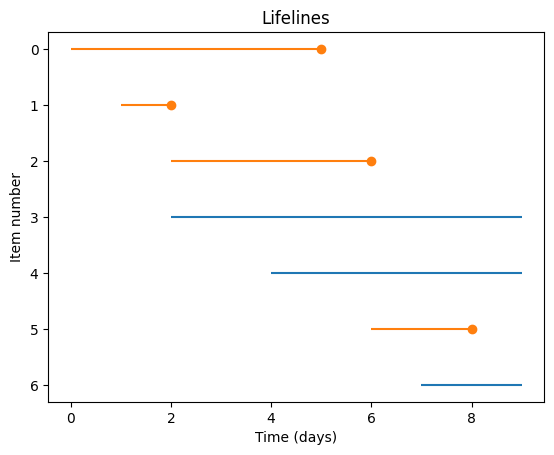

In [6]:
def plot_lifelines(obs, y_label="Item number", x_label="Time (days)", title="Lifelines"):
    """Plot a line for each observation.
    
    obs: DataFrame
    """
    for y, row in obs.iterrows():
        start = row['start']
        end = row['end']
        status = row['status']
        
        if status == 0:
            # ongoing
            plt.hlines(y, start, end, color='C0')
        else:
            # complete
            plt.hlines(y, start, end, color='C1')
            plt.plot(end, y, marker='o', color='C1')
            
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.gca().invert_yaxis()

plot_lifelines(obs)

Each line represents one item. If there is a dot in the end, it implies the event has occurred. Else, it has not occurred. 
As you can see, some of the items are right censored.

## 12. Estimating survival times

We have a mixture of complete and incomplete observations.

When we have a mixture of complete and incomplete observations -- adopted and unadopted dogs -- we can't compute the Survival function directly. Instead, we have to work backwards: we estimate the hazard function first, then use it to compute the survival function, CDF, and PMF.

In [46]:
duration = obs['end'] - obs['start']

# Create a copy and shift the starting times.
shifted = obs.copy()
shifted['start'] = 0
shifted['end'] = duration

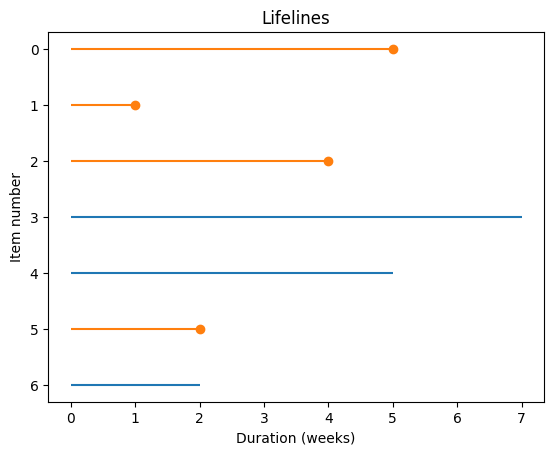

In [45]:
plot_lifelines(shifted)
plt.xlabel('Duration (weeks)');

Notice that the x-axis in this figure is duration, not time.

The second key idea is that we can estimate the hazard function by considering: The number of dogs adopted at each duration, divided by the number of dogs "at risk" at each duration, where "at risk" means that they could be adopted.

For example:

- At duration 1, there is 1 adoption out of 7 dogs at risk, so the hazard rate is 1/7.

- At duration 2, there is 1 adoption out of 6 dogs at risk, so the hazard rate is 1/6.

- At duration 4, there is 1 adoption out of 4 dogs at risk, so the hazard rate is 1/4.

And so on. Now let's see how that works computationally.

## 13. Estimating the Hazard function

To be able to compute the hazard, let's compute the denominator of the hazard function first, which is the number of 'available' dogs at a given time.

In [48]:
# The amount of time (duration) each dog 'survived' before being adopted.
duration

0    5
1    1
2    4
3    7
4    5
5    2
6    2
dtype: int64

Let's get the unique of these durations (now 'time points') and compute the number of dogs 'available' at each of these times.

In [49]:
ts = duration.unique()
ts.sort()
ts

array([1, 2, 4, 5, 7], dtype=int64)

To compute the number of dogs at risk, we can loop through ts and count the number of dogs where t is less than or equal to end.


In [50]:
at_risk = pd.Series(0, index=ts)

for t in ts:
    k = (t <= shifted['end'])
    at_risk[t] = k.sum()
    
at_risk

1    7
2    6
4    4
5    3
7    1
dtype: int64

These are the denominators of the Hazard function, which is the number of dogs available at each time.

__How to read above output?__

- At time 1: 7 dogs were available
- At time 2: 6 dogs were available
- At time 4: 4 dogs were available and so on

Now, let's compute the numerator: which is the number of dogs adopted at each 't'.

In [51]:
adopted = pd.Series(0, index=ts)

for t in ts:
    k = (shifted['status'] == 1) & (t == shifted['end'])
    adopted[t] = k.sum()
    
adopted

1    1
2    1
4    1
5    1
7    0
dtype: int64

Put it in a dataframe

In [52]:
d = dict(adopted=adopted, 
         at_risk=at_risk)
df = pd.DataFrame(d, index=ts)
df

,adopted,at_risk
1,1,7
2,1,6
4,1,4
5,1,3
7,0,1


Finally, the hazard function is the ratio of adopted and at_risk:

In [53]:
df['hazard'] = df['adopted'] / df['at_risk']
df

,adopted,at_risk,hazard
1,1,7,0.142857
2,1,6,0.166667
4,1,4,0.250000
5,1,3,0.333333
7,0,1,0.000000


## 14. Reverse engineering the Hazard function

Given the hazard function, we can work backwards to compute the survival curve.

The hazard function is the probability of being adopted at each duration, so its complement is the probability of not being adopted.

In order to survive past t, a dog has to not be adopted at all durations up to and including t.

So the survival function is the cumulative product of the complement of the hazard function.

In [54]:
df['surv'] = (1 - df['hazard']).cumprod()
df

,adopted,at_risk,hazard,surv
1,1,7,0.142857,0.857143
2,1,6,0.166667,0.714286
4,1,4,0.250000,0.535714
5,1,3,0.333333,0.357143
7,0,1,0.000000,0.357143


The CDF is the complement of the survival function. We saw this in the previous section.

In [55]:
df['cdf'] = 1 - df['surv']
df

,adopted,at_risk,hazard,surv,cdf
1,1,7,0.142857,0.857143,0.142857
2,1,6,0.166667,0.714286,0.285714
4,1,4,0.250000,0.535714,0.464286
5,1,3,0.333333,0.357143,0.642857
7,0,1,0.000000,0.357143,0.642857


The PMF is the difference between adjacent elements of the CDF.

In [56]:
df['pmf'] = np.diff(df['cdf'], prepend=0)
df

,adopted,at_risk,hazard,surv,cdf,pmf
1,1,7,0.142857,0.857143,0.142857,0.142857
2,1,6,0.166667,0.714286,0.285714,0.142857
4,1,4,0.250000,0.535714,0.464286,0.178571
5,1,3,0.333333,0.357143,0.642857,0.178571
7,0,1,0.000000,0.357143,0.642857,0.000000


# SECTION 4: Kaplan-Meier using lifelines

## 15. Estimating Kaplan-Meier using lifelines

In [59]:
# !pip install lifelines
# !pip install lifelines==0.27.8

__Load the package and init__

In [60]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

This object takes the durations of both ongoing and complete cases and the status of each case.


In [61]:
# Durations
T = shifted['end']
T

0    5
1    1
2    4
3    7
4    5
5    2
6    2
Name: end, dtype: int64

In [62]:
# Status
E = shifted['status']
E

0    1
1    1
2    1
3    0
4    0
5    1
6    0
Name: status, dtype: int64

__Fit the model__

In [63]:
kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7 total observations, 3 right-censored observations>

__Extract the survival function__

In [64]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.857143
2.0,0.714286
4.0,0.535714
5.0,0.357143
7.0,0.357143


The above output is identical to what we computed manually. `lifelines` also computes a confidence interval for the survival function.

In [65]:
ci = kmf.confidence_interval_survival_function_
ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
1.0,0.334054,0.978561
2.0,0.258154,0.919797
4.0,0.131988,0.824997
5.0,0.051977,0.698713
7.0,0.051977,0.698713


__Plot survival curve__



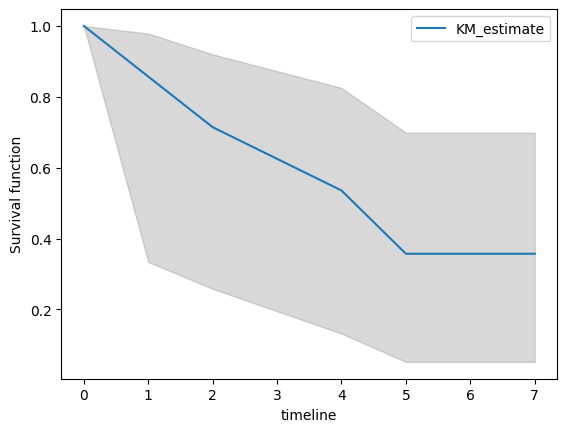

In [66]:
ts = ci.index
low, high = np.transpose(ci.values)

plt.fill_between(ts, low, high, color='gray', alpha=0.3)
kmf.survival_function_.plot(ax=plt.gca())
plt.ylabel('Survival function');